In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import math
import statistics

%matplotlib inline

In [3]:
df_train = pd.read_csv(r'D:\ML100\Day35\Titanic_train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#1.最大值來看為異常值，超過1.5的IQR,也超過三倍標準差範圍外
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [6]:
#2. 3倍標準差 有20筆是異常值
Fare_mean = df_train['Fare'].mean()
Fare_3std = 3 *(df_train['Fare'].std())
sigma_lower = Fare_mean-Fare_3std
sigma_upper = Fare_mean+Fare_3std

print(Fare_mean)
print(Fare_3std)
print(sigma_lower)
print(sigma_upper)

df_train_outliers = df_train[(df_train['Fare'] < sigma_lower) | (df_train['Fare']  > sigma_upper)]
df_train_outliers.info()

32.2042079685746
149.0802857915427
-116.87607782296811
181.2844937601173
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 27 to 779
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  20 non-null     int64  
 1   Survived     20 non-null     int64  
 2   Pclass       20 non-null     int64  
 3   Name         20 non-null     object 
 4   Sex          20 non-null     object 
 5   Age          18 non-null     float64
 6   SibSp        20 non-null     int64  
 7   Parch        20 non-null     int64  
 8   Ticket       20 non-null     object 
 9   Fare         20 non-null     float64
 10  Cabin        17 non-null     object 
 11  Embarked     20 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ KB


7.9104
31.0
-26.724
65.6344
<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 1 to 879
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  116 non-null    int64  
 1   Survived     116 non-null    int64  
 2   Pclass       116 non-null    int64  
 3   Name         116 non-null    object 
 4   Sex          116 non-null    object 
 5   Age          101 non-null    float64
 6   SibSp        116 non-null    int64  
 7   Parch        116 non-null    int64  
 8   Ticket       116 non-null    object 
 9   Fare         116 non-null    float64
 10  Cabin        90 non-null     object 
 11  Embarked     114 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 11.8+ KB


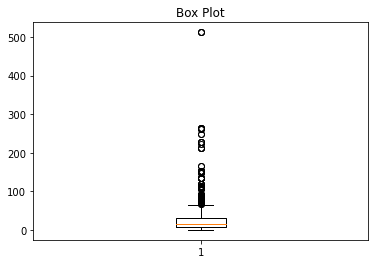

In [7]:
#3.盒鬚圖判別法(IQR method)異常值共116筆:
sorted(df_train['Fare'])
Fare_Q1,Fare_Q3 = np.percentile(df_train['Fare'] , [25,75])
IQR = Fare_Q3 - Fare_Q1
lower_range = Fare_Q1 - (1.5 * IQR)
upper_range = Fare_Q3 + (1.5 * IQR)

print(Fare_Q1)
print(Fare_Q3)
print(lower_range)
print(upper_range)

df_train_outliers = df_train[(df_train['Fare'] < lower_range) | (df_train['Fare']  > upper_range)]
df_train_outliers.info()

plt.boxplot(df_train['Fare'][~np.isnan(df_train['Fare'])],whis=1.5)    #作圖 whis=IQR
plt.title('Box Plot')
plt.show()

In [7]:
# df_train.groupby(df_train['Fare']).count()
# t = df_train['Fare'].value_counts().reset_index()
# t.columns = ['Fare','Counts']
# t
